In [1]:
%matplotlib inline
%matplotlib notebook
# %load_ext autoreload
# %autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('data/2/hw1x.dat') as x:
    x = [float(o) for o in x.readlines() if o.strip() != '']
with open('data/2/hw1y.dat') as y:
    y = [float(o) for o in y.readlines() if o.strip() != '']

In [3]:
assert(len(x) == len(y))

### a. plot data

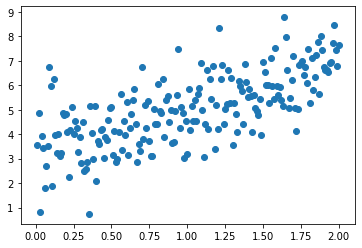

In [4]:
plt.scatter(x, y)

### b. plot with closed formula

In [5]:
x = np.concatenate([np.array(x)[np.newaxis, :], np.ones( (1, len(x)) )], axis=0).T

In [6]:
# use np built in function to test the values
# m, c = np.linalg.lstsq(x, y, rcond=None)[0]
# m, c

In [7]:
w = np.linalg.inv(np.dot(x.T, x)).dot(np.dot(x.T, y))
w

array([1.78157138, 3.2447227 ])

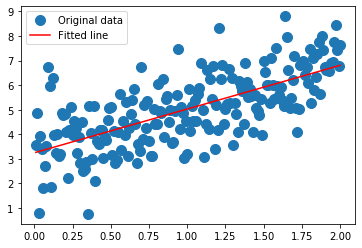

In [8]:
plt.plot(x[:, 0], y, 'o', label='Original data', markersize=10)
plt.plot(x[:, 0], np.dot(x, w), 'r', label='Fitted line')
plt.legend()

### c. Empirical Risk

In [9]:
loss_function = lambda x, w, y: np.mean(np.square(np.dot(x, w) - y)) / 2
loss = loss_function(x, w, y)
loss

0.5812605752543937

### d. Gradient descent

$w^{k+1} = w^{k} - \{lr * -(y-w^{T}*x) * x\}$

In [44]:
learning_rate = 0.01
# def GD(x, y, w, iteration):
#     loss = 0
#     temp = 0
#     for x_i, y_i in zip(x, y):
#         temp += -(y_i-np.dot(x_i,w)) * learning_rate * x_i
#         loss += np.square(y_i-np.dot(x_i,w)) / 2
#     w -= (temp / len(x))
#     if iteration % 10 ==0: print(f'iteration {iteration}: {loss/len(x)}')
#     return w, loss/len(x)

def GD(x, y, w, iteration):
    loss = 0
    grad = np.array(x).T.dot((y - np.dot(x, w))[:, np.newaxis])/len(x)
    w += (learning_rate * grad).squeeze()
    loss = np.mean(   np.square(y - np.dot(x, w)) / 2  )
    if iteration % 10 ==0: print(f'iteration {iteration}: {loss}')
    return w, loss

In [45]:
w = np.zeros(2)
loss_list = []
for iteration in range(100):
    w, loss = GD(x, y, w, iteration)
    loss_list.append(loss)

print()
print(f"iteration {np.argmin(loss_list)} have the smallest loss")
print(f"theta {w} have the smallest empiracal weight")

iteration 0: 13.219917694196358
iteration 10: 8.739737616090865
iteration 20: 5.862003229202535
iteration 30: 4.013127661776887
iteration 40: 2.8248493954656997
iteration 50: 2.0607321097012345
iteration 60: 1.5689753307886365
iteration 70: 1.252117423064452
iteration 80: 1.0475839807873282
iteration 90: 0.9151992993195254

iteration 99 have the smallest loss
theta [2.23076713 2.12796385] have the smallest empiracal weight


### Stochastic Gradient Descent
this include:
1. random shuffle
2. update weight one example at a time

In [12]:
import copy
learning_rate = 0.01
def SGD(x, y, w, iteration):
    loss = 0
    for x_i, y_i in zip(x, y):
        w -= -(y_i-np.dot(x_i,w)) * learning_rate * x_i
#         loss += np.square(y_i-np.dot(x_i,w)) / (2 * len(x)) 
    loss = np.mean( np.square(y-np.dot(x, w))/2 )
    if iteration % 10 ==0: print(f'iteration {iteration}: {loss}')
    return w

In [13]:
w = np.zeros(2)
for iteration in range(50):
    c = list(zip(x, y))
    np.random.shuffle(c)
    x, y = zip(*c)
    x = np.array(x)
    w = SGD(x, y, w, iteration)
    
print(f"theta {w} have the smallest empiracal weight")

iteration 0: 0.6652904671555413
iteration 10: 0.5815257261672285
iteration 20: 0.581279104682629
iteration 30: 0.5849563042976988
iteration 40: 0.582303431371367
theta [1.8777919  3.33372858] have the smallest empiracal weight


### f. Function for closed form formula $w = (X^TX)^{-1} X^T y $

In [74]:
def PolyRegress(x_1d, y, d):
    """
    x: np.array
    y: np.array
    """
    x = np.power(x_1d[:, np.newaxis], list(range(d+1)))
    w = np.linalg.lstsq(x, y, rcond=None)[0] # cannot use this code to replace closed form formula
    w = np.linalg.inv(np.dot(x.T, x)).dot(np.dot(x.T, y))
    loss = np.mean(np.square(np.dot(x, w)-y)/2)
    return w, loss, x

### g. 

In [75]:
w, loss, x_order = PolyRegress(x[:, 0], y, 2)

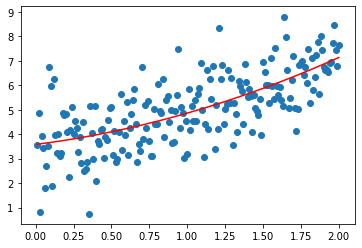

In [76]:
plt.scatter(x[:, 0], y)
x_order = x_order[np.argsort(x_order[:,1])]
plt.plot(x_order[:, 1], np.dot(x_order, w), 'r')

### order range from 3 to 9

Text(0.5, 0, 'order')

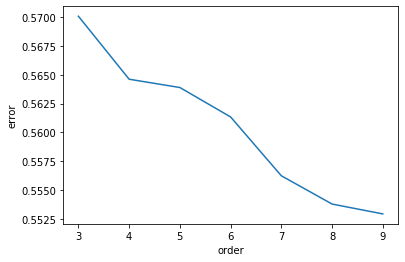

In [77]:
plt.plot(range(3, 10), [PolyRegress(x[:, 0], y, i)[1] for i in range(3, 10)])
plt.ylabel('error')
plt.xlabel('order')

### order range from 1 to 40

Text(0.5, 0, 'order')

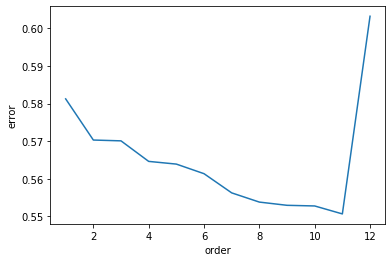

In [78]:
order = 13
losses = [PolyRegress(x[:, 0], y, i)[1] for i in range(1, order)]
plt.plot(range(1, order), losses)
plt.ylabel('error')
plt.xlabel('order')

### the emprical cost does not increase from 3rd order to the 9th order
### but error increases generally from the 12th epoch